Grupo 7 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj


In [3]:
# importo el Mapa de Argentina con info por provincias

data_location = "./provincias/provincia.shx"

mapa_argentina = gpd.read_file(data_location)

mapa_argentina.head(24)

,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,5,0,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,6,0,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,7,0,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,8,0,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,9,0,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,10,0,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


<AxesSubplot:>

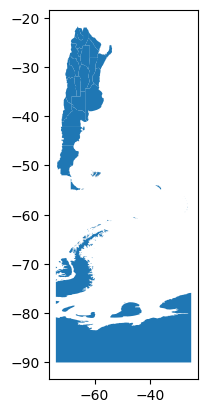

In [4]:
mapa_argentina.plot()

In [5]:
# traigo el dataset Properatti

df_properatti= pd.read_csv('../properatti.csv',sep=',')
df_properatti.shape

(121220, 26)

In [6]:
# nombre columnas

list(df_properatti.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

In [7]:
# primer valor de cada columna
for column in df_properatti.columns:
    print(f"{column}: {df_properatti[column].iloc[0]}")

Unnamed: 0: 0
operation: sell
property_type: PH
place_name: Mataderos
place_with_parent_names: |Argentina|Capital Federal|Mataderos|
country_name: Argentina
state_name: Capital Federal
geonames_id: 3430787.0
lat-lon: -34.6618237,-58.5088387
lat: -34.6618237
lon: -58.5088387
price: 62000.0
currency: USD
price_aprox_local_currency: 1093959.0
price_aprox_usd: 62000.0
surface_total_in_m2: 55.0
surface_covered_in_m2: 40.0
price_usd_per_m2: 1127.2727272727273
price_per_m2: 1550.0
floor: nan
rooms: nan
expenses: nan
properati_url: http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele
description: 2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
title: 2 AMB TIPO CASA SIN EXPENS

In [176]:
# quiero quedarme solo con los valores 'lat' y 'lon' para crear un geodataframe.
# Primer paso de la normalizacion de la geografia: 
    # defino una funcion custom para mi apply. 
    # Si para cada fila, los valores de la columna 'lat' y 'lon' son nulos:
        # caso 1, si la columa 'lat-lon' no es null:
            # traeme el valor de la columna 'lat-lon'. Como es un string, divido en dos partes en la coma y mando 
            # cada valor a una de las columnas.
        # caso 2, si la columa 'lat-lon' es null (else):
            # ponele el string "to geonames_id". (Estos campos van al segundo paso de la normalizacion)
    # Else (cols 'lat' y 'lon' no son nulos)
        # no hace nada

def normalize_geography(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        if not pd.isnull(row['lat-lon']):
            row[['lat', 'lon']] = row['lat-lon'].str.split(',', expand=True)
            return row
        else:
            row[['lat', 'lon']] = ["to geonames_id", "to geonames_id"]
            return row # Si quisiera hacer todo en un solo paso podria poner aca la funcion 'normalize_geonameid'
    else:
        return row


result = df_properatti.apply(normalize_geography, axis=1)

In [163]:
# Dataframe con la info sobre geonames_id

location_geonames = 'provincias/AR/AR.csv'
data_geonames = gpd.read_file(location_geonames, sep='\t')
data_geonames.head(5)

,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,ADMIN1,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry
0,3427200,Sierra del 15,Sierra del 15,,-37.96613,-57.94670,T,HLL,AR,,01,06357,,,0.0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30,POINT (-57.94670 -37.96613)
1,3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,,-28.63333,-56.11667,S,HSE,AR,,06,18168,,,0.0,NaN,79,America/Argentina/Cordoba,2016-01-30,POINT (-56.11667 -28.63333)
2,3427202,Cañada del Zorro,Canada del Zorro,,-32.16667,-59.50000,H,STM,AR,,08,,,,0.0,NaN,65,America/Argentina/Cordoba,1993-12-21,POINT (-59.50000 -32.16667)
3,3427203,Estancia Zorraquín,Estancia Zorraquin,,-31.51553,-58.55208,S,RNCH,AR,,08,30113,,,0.0,NaN,71,America/Argentina/Cordoba,2016-01-30,POINT (-58.55208 -31.51553)
4,3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,,-28.43825,-56.08838,S,RNCH,AR,,06,18168,,,0.0,NaN,98,America/Argentina/Cordoba,2016-01-30,POINT (-56.08838 -28.43825)


In [164]:
data_geonames.dtypes

GEONAMEID       object
NAME            object
ASCIINAME       object
ALTNAMES        object
LATITUDE       float64
LONGITUDE      float64
FEATCLASS       object
FEATCODE        object
COUNTRY         object
CC2             object
ADMIN1          object
ADMIN2          object
ADMIN3          object
ADMIN4          object
POPULATION     float64
ELEVATION      float64
GTOPO30          int64
TIMEZONE        object
MODDATE         object
geometry      geometry
dtype: object

In [179]:
# convierte a float64 la columna 'GEONAMEID' que es un string 

data_geonames['GEONAMEID'] = pd.to_numeric(data_geonames['GEONAMEID'], errors='coerce').astype(float)
data_geonames.dtypes


GEONAMEID      float64
NAME            object
ASCIINAME       object
ALTNAMES        object
LATITUDE       float64
LONGITUDE      float64
FEATCLASS       object
FEATCODE        object
COUNTRY         object
CC2             object
ADMIN1          object
ADMIN2          object
ADMIN3          object
ADMIN4          object
POPULATION     float64
ELEVATION      float64
GTOPO30          int64
TIMEZONE        object
MODDATE         object
geometry      geometry
dtype: object

In [219]:
# busca los valores de 'geonames_id' en el dataframe 'data_geonames'
# cuando los encuentra, se trae el valor de las columnas 'LATITUDE' y 'LONGITUDE'


def normalize_geonameid(row):
    geoname_id = row['geonames_id']
    if geoname_id in data_geonames['GEONAMEID'].values:
        matching_row = data_geonames[data_geonames['GEONAMEID'] == geoname_id]
        row['lat'] = pd.to_numeric(matching_row['LATITUDE'].values[0]).astype(float)
        row['lon'] = pd.to_numeric(matching_row['LONGITUDE'].values[0]).astype(float)
    return row
    
df_properatti__norm_lat_lon = result.apply(normalize_geonameid, axis=1)

In [240]:
# chequeo que el valor "to geonames_id" ya no este. 

search_value = "to geonames_id"
is_value_present = (df_properatti__norm_lat_lon['lon'] == search_value).sum()

print(is_value_present)

# todavia existen algunos. Quiere decir que algunas filas no tienen ninguna informacion geografica.

8346


In [248]:
# los campos donde no hay ninguna info geografica se filtran 

columns = ['lat', 'lon']

mask = df_properatti__norm_lat_lon['lat'] != "to geonames_id" 
mask1 = df_properatti__norm_lat_lon['lon'] != "to geonames_id"

filtered_df_geography = df_properatti__norm_lat_lon[mask & mask1 ]

filtered_df_geography[columns].shape

(112874, 2)

In [249]:
# creo una geoserie con toda la info geografica 
geometry = gpd.points_from_xy(pd.to_numeric(filtered_df_geography.lon), pd.to_numeric(filtered_df_geography.lat))
geometry

geodataframe_df_properatti = gpd.GeoDataFrame(geometry = geometry)
geodataframe_df_properatti.head(10)


,geometry
0,POINT (-58.50000 -34.66667)
1,POINT (-58.00000 -35.00000)
2,POINT (-58.50000 -34.66667)
3,POINT (-58.52386 -34.64286)
4,POINT (-57.54945 -38.00263)
5,POINT (-59.00000 -33.25000)
6,POINT (-58.52421 -34.53021)
7,POINT (-58.45829 -34.56270)
8,POINT (-58.45829 -34.56270)
9,POINT (-60.75000 -33.16667)


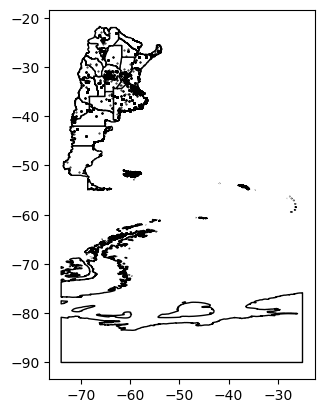

In [254]:
# Mapa de Argentina
ax = mapa_argentina.plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
geodataframe_df_properatti.plot(ax=ax, color='black', markersize=0.2)

plt.show()